In [74]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import datetime 
import seaborn as sns
%matplotlib inline

In [54]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 10, 19)
AAPL = web.DataReader('AAPL', 'iex', start, end)
AMZN = web.DataReader('AMZN', 'iex', start, end)
GOOGL = web.DataReader('GOOGL', 'iex', start, end)

In [55]:
tickers = ['AAPL', 'AMZN' , 'GOOGL']


In [56]:
stocks = pd.concat([AAPL,AMZN,GOOGL ], axis =1 , keys= ['AAPL', 'AMZN' , 'GOOGL']  )

In [57]:
stocks.columns.names = ['Tickers', 'Data']

In [58]:
stocks.head()

Tickers         AAPL                                             AMZN  \
Data            open      high       low     close    volume     open   
date                                                                    
2018-01-02  168.2280  170.3437  167.3382  170.3042  25555934  1172.00   
2018-01-03  170.5711  172.5682  170.0076  170.2745  29517899  1188.30   
2018-01-04  170.5810  171.5005  170.1262  171.0654  22434597  1205.00   
2018-01-05  171.4708  173.3789  171.0852  173.0131  23660018  1217.51   
2018-01-08  172.3705  173.6162  171.9552  172.3705  20567766  1236.00   

Tickers                                           GOOGL                    \
Data           high      low    close   volume     open     high      low   
date                                                                        
2018-01-02  1190.00  1170.51  1189.01  2694494  1053.02  1075.98  1053.02   
2018-01-03  1205.49  1188.30  1204.20  3108793  1073.93  1096.10  1073.43   
2018-01-04  1215.87  1204.66  1209.59  3022089  1097.09  1104.08  1094.26   
2018-01-05  1229.14  1210.00  1229.14  3544743  1103.45  1113.58  1101.80   
2018-01-08  1253.08  1232.03  1246.87  4279475  1111.00  1119.16  1110.00   

Tickers                       
Data          close   volume  
date                          
2018-01-02  1073.21  1588268  
2018-01-03  1091.52  1565945  
2018-01-04  1095.76  1302569  
2018-01-05  1110.29  1512526  
2018-01-08  1114.21  1232221

In [59]:

stocks.xs(key='close',axis=1,level='Data').max()

Tickers
AAPL      232.07
AMZN     2039.51
GOOGL    1285.50
dtype: float64

In [69]:
returns = pd.DataFrame()

In [70]:
for i in tickers:
    returns[i + ' returns'] = stocks[i]['close'].pct_change()

In [72]:
returns.head()

,AAPL returns,AMZN returns,GOOGL returns
date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.017061
2018-01-04,0.004645,0.004476,0.003884
2018-01-05,0.011386,0.016163,0.013260
2018-01-08,-0.003714,0.014425,0.003531


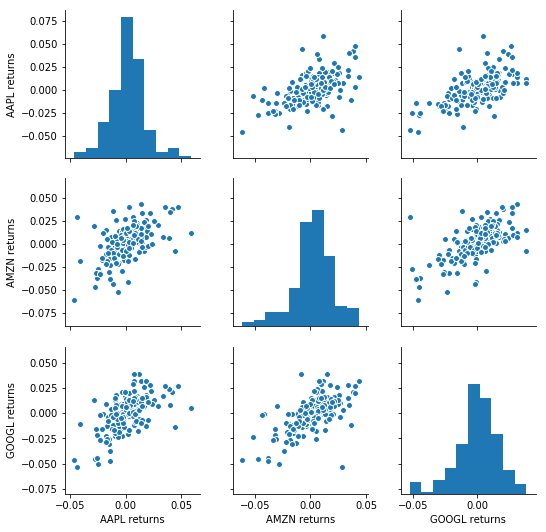

In [75]:
sns.pairplot(returns[1:])

In [76]:
#std deviation
returns.std()

AAPL returns     0.015122
AMZN returns     0.017339
GOOGL returns    0.016095
dtype: float64

/Users/davidssd/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


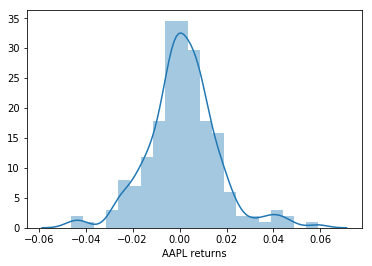

In [84]:
sns.distplot(returns.iloc[1:]['AAPL returns'])